#  数据科学入门2.5：基本的聚类

![](2020-03-05-10-58-16.png)

## 啥是聚类

聚类是一种非监督学习，他和分类不一样，分类的训练数据中每个样本是有标签标注了他是属于哪一类的，我们明确的是知道有哪几类。而聚类不一样，我们只有一堆数据，并不知道这些训练数据分别属于哪一类别，甚至完全被不知道有哪些类别（有时候可以知道）。聚类就是根据这些样本的特征把比较像的归为一类。比如你上网易云音乐或者什么别的软件的时候，他的推荐算法会对你进行聚类，把你和某些人归为一类从而给你推荐这些人喜欢的歌曲。

聚类一般是基于样本在特征空间的距离的。还记得我们以前讲的一个样本的特征就是向量，这些向量可以构成一个特征空间。这个空间中距离比较近的样本我们认为他们就是一类。

![](2020-03-05-11-03-39.png)

聚类有很多种玩法例如:

1. Connectivity based   
   这种办法就是任务距离考的进地两个点就被连起来了，成为一个cluster，距离远的够不着得就是另一个cluster，这种方法一本不用指定有几个cluster，他会自动的得到cluster得数量，你要指定的时链接的最远距离

   ![](2020-04-03-14-46-05.png)

2. Density based  
   这种玩法时认为一个cluster是由足够密集得点组成的，你定义一个半径，和点数，如果某个样本在这个半径之内有这么个多点，那天就能成一个cluster，如果不能就单独一个cluster，这个也是不需要指定cluster个数的。

![](2020-04-03-14-49-13.png)

3. Distribution based  
   这种玩法是认为同一个cluster得点是同一个distribution产生的。我们定义几个distribution，让这些点为是某个distribution产生的概率最大化，就得到了cluster了。

![](2020-04-03-14-52-07.png)

4. Centroid based
   这个就是我们今天着重要讲的K-Means这种方法的原理。

我们今天只讲简单的K-means，其他的大家可以下去自学。

## k-means clustering的基本原理

之前讲过了k-means是基于距离的，Means就是平均，就是几个点距离的平均的意思，也就是这些点的中心（centroid），K是分为几类。我们用1维数据举个例子：

![](2020-03-05-11-04-15.png)

1. 确定分为几类，k=？我们这里让k=3
2. 随便选择3个样本点作为3个类型的重心

![](2020-03-05-11-07-24.png)

3. 计算每个点到这些重心的距离，离哪个近就属于哪一类

![](2020-03-05-11-10-56.png)

4. 根据这个聚类的结果，重新计算每一个类型的重心，可以看到目前聚类结果不咋样

![](2020-03-05-11-13-24.png)

5. 用这个新的重心重复3-4步，直到重心不再变化位置

![](wkmeans_1.gif)

6. 评价这个聚类的得分：
$$
   se=\sum_{k=1}^{Clusters}\sum_{i=1}^{n}D_{ki}
$$

这个就是总的误差，就是每个点到他自身cluster重心的距离求和，再k一定的情况下，这个值越小越好。k-means即使取同一个k，由于初始的重心是随机的，每次算一遍结果也可能会不同。但要注意这个k只能在se只能在同一个k的情况下比较，显然随着k的增大，se会减小的，假如k=n，就是每个点自身就是一类，那中心就是本身，se=0。

### K如何取值

这个有很多种办法，最常见的就是根据我们的目标。比如把学生分为听话的和不听话的，那么K就是2，把明星分为男、女、不男不女，那么k=3。

有些事后我们啥也不知道，怎么办？那就用elbow method。这是怎么玩呢？我们就让k=2开始增加k的值，不断地做clustering，计算se，并且把他画出来。当se下降的最大到se下降平缓的时候那个拐点，就是我们要的k值。因为当增加k的时候误差减小的小，说明我们在分类并没有解释更多误差，增加k分类的意义不大。

![](2020-03-05-12-49-00.png)

这里可以看到，我们想要的k值就是3。

![](2020-03-05-12-58-10.png)

![](2020-03-05-12-58-47.png)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
iris = pd.read_csv('exp9.csv')
iris.drop(columns=['Id'], inplace=True)
df = iris.iloc[:, :-1]
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# 记录不同k值下的se
distortions = []
models=[]
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df)
    models.append(model)
    distortions.append(model.inertia_)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


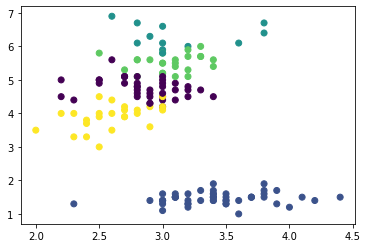

In [3]:
plt.scatter(df.values[:,1],df.values[:,2],c=models[4].predict(df))


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

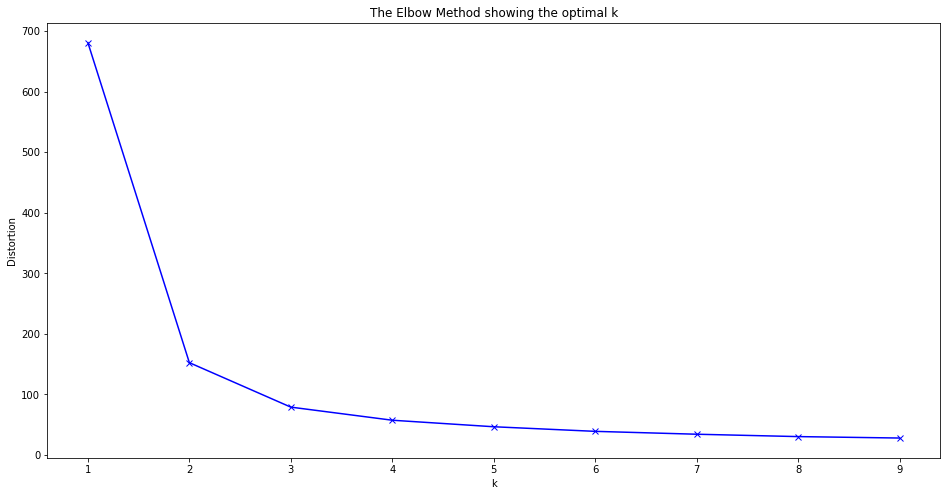

In [4]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
#plt.show()


看几种其他的聚类：

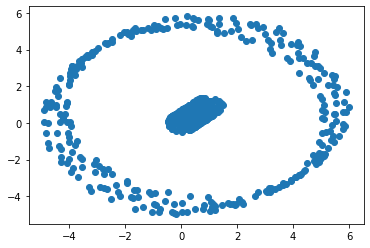

In [5]:
import numpy as np

N = 300
r_1 = 0.5
r_2 = 5
theta = np.linspace(0, 2*np.pi, N)

X_1 = r_1 * np.array([np.cos(theta), np.sin(theta)]) + np.random.rand(N)
X_2 = r_2 * np.array([np.cos(theta), np.sin(theta)]) + np.random.rand(N)

X = np.append(X_1.transpose(), X_2.transpose(), axis=0)
plt.scatter(X[:, 0], X[:, 1])


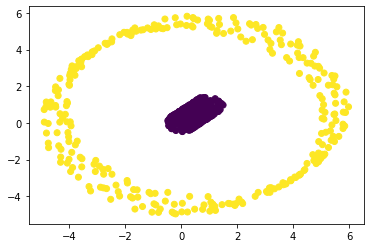

In [6]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=1, min_samples=3)
dbscan_result = dbscan_model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_result)


In [8]:
# Generate some data
import numpy as np
from sklearn.mixture import GaussianMixture

mu_1 = [1, 2]
sigma_1 = [[2, 0], [0 ,0.5]]
mu_2 = [-3, -5]
sigma_2 = [[1, 0], [0, 1]]

X = np.append(np.random.multivariate_normal(mu_1, sigma_1, 1000), np.random.multivariate_normal(mu_2, sigma_2, 1000), axis=0)
X

array([[ 1.3048475 ,  2.18313313],
       [ 0.88847656,  1.93990229],
       [ 0.59136023,  2.52382111],
       ...,
       [-4.49184818, -3.53917377],
       [-3.36392577, -5.94349584],
       [-4.54310315, -4.07571421]])

In [9]:
gmm_model = GaussianMixture(n_components=2)
gmm_model = gmm_model.fit(X)
gmm_result = gmm_model.predict(X)

C:\Users\11016\AppData\Local\Temp/ipykernel_3960/2351257565.py:10: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='Accent')


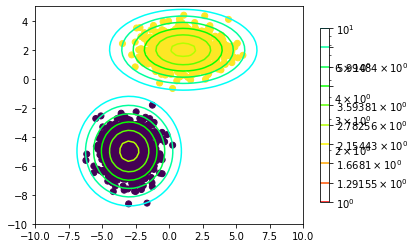

In [10]:
from matplotlib.colors import LogNorm
mesh_x, mesh_y = np.linspace(-10, 10), np.linspace(-10, 5)
mesh_X, mesh_Y = np.meshgrid(mesh_x, mesh_y)
mesh_XX = np.array([mesh_X.ravel(), mesh_Y.ravel()]).T
mesh_Z = -gmm_model.score_samples(mesh_XX)
mesh_Z = mesh_Z.reshape(mesh_X.shape)

CS = plt.contour(mesh_X, mesh_Y, mesh_Z, norm=LogNorm(vmin=1, vmax=100),
                 levels=np.logspace(0, 1, 10), cmap='hsv')
CB = plt.colorbar(CS, shrink=0.8, extend='Accent')

plt.scatter(X[:, 0], X[:, 1], c=gmm_result)

Quiz:

用前述三种方法交叉聚类一下各自的数据

更多的聚类方法和例程可以参见

https://scikit-learn.org/stable/modules/clustering.html